In [14]:
# Import necessary libraries
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import emoji
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

In [15]:
# Get a better view of the dataset
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 300)

# Load data
df = pd.read_csv(r"C:\Users\PC\Desktop\PycharmProjects\DataAnalysis\bill_gates_tweets.csv")

In [16]:
# View our data
df.head()

,tweets,likes,date
0,@mansukhmandviya It was great to meet Dr @mans...,689,2022-05-28 15:02:08+00:00
1,Happy to meet Prime Minister @sanchezcastejon ...,3407,2022-05-27 16:09:28+00:00
2,The school shooting in Texas is heartbreaking....,5980,2022-05-25 16:05:22+00:00
3,"Not long ago, the world increased aid for glob...",1748,2022-05-24 17:02:16+00:00
4,.@PardisSabeti is working to detect pathogens ...,1859,2022-05-23 19:13:30+00:00


In [17]:
df.dtypes

tweets    object
likes      int64
date      object
dtype: object

In [18]:
# Let's parse our 'date' column
df['date_parsed'] = pd.to_datetime(df['date'], infer_datetime_format=True)

# Now we can create a column that has the hour (UTC±00:00) that the tweet was created
df['publish_hour'] = df['date_parsed'].dt.hour

# We can drop the 'date' object column now
df.drop(['date'], axis=1, inplace=True)

In [19]:
df.dtypes

tweets                       object
likes                         int64
date_parsed     datetime64[ns, UTC]
publish_hour                  int64
dtype: object

In [20]:
# Let's create our function to clean the tweets
def tweet_cleaner(words):
    # This will delete any emojis from the sentences
    words = emoji.replace_emoji(words, replace="")
    # This will transform all words to lowercase
    words = words.lower()
    # This will delete all mentions and hashtags
    words = re.sub("@[A-Za-z0-9]+", "", words)
    words = re.sub("#[A-Za-z0-9_]+", "", words)
    # This will delete links
    words = re.sub(r"http\S+", "", words)
    words = re.sub(r"www.\S+", "", words)
    # Delete character which are not a word character
    words = re.sub('\W+', ' ', words)
    return words

In [21]:
# Create new column with preprocessed text
df['tweets_cleaned'] = df['tweets'].map(lambda x: tweet_cleaner(x))
# Drop null values if any
df.dropna(inplace=True)

df.head()

                                              tweets  likes               date_parsed  publish_hour                                     tweets_cleaned
0  @mansukhmandviya It was great to meet Dr @mans...    689 2022-05-28 15:02:08+00:00            15   it was great to meet dr and exchange perspect...
1  Happy to meet Prime Minister @sanchezcastejon ...   3407 2022-05-27 16:09:28+00:00            16  happy to meet prime minister and members of hi...
2  The school shooting in Texas is heartbreaking....   5980 2022-05-25 16:05:22+00:00            16  the school shooting in texas is heartbreaking ...
3  Not long ago, the world increased aid for glob...   1748 2022-05-24 17:02:16+00:00            17  not long ago the world increased aid for globa...
4  .@PardisSabeti is working to detect pathogens ...   1859 2022-05-23 19:13:30+00:00            19   is working to detect pathogens earlier and st...


(3200, 5)

In [ ]:
# Looks like there were no null values
df.shape

In [22]:
# Text preprocessing
# Create celaned tweets list
tweets_cleaned_list = []
for clean in df['tweets_cleaned']:
    tweets_cleaned_list.append(clean)

print("Raw tweets: \n", df['tweets'][0])
print("Cleaned tweets:\n", df['tweets_cleaned'][0])

# Create tokens
sentences_tokenized = [word_tokenize(tokens) for tokens in tweets_cleaned_list]
print("Token tweets:\n", sentences_tokenized[0])

# Remove stopwords
sentences_tokenized2 = []
for words in sentences_tokenized:
    w = []
    for word in words:
        if not word in stopwords.words('english'):
            w.append(word)
    sentences_tokenized2.append(w)

print("Removed stopwords:\n", sentences_tokenized2[0])

# Stemming the words
stemmer = PorterStemmer()
stemmed = []
for words in sentences_tokenized:
    w = []
    for word in words:
        w.append(stemmer.stem(word))
    stemmed.append(w)

print("Stemmization:\n", stemmed[0])

# Lemmatization of words
lemmatizer = WordNetLemmatizer()
lemmatized = []
for i in sentences_tokenized:
    w = []
    for x in i:
        w.append(lemmatizer.lemmatize(x))
    lemmatized.append(w)

print("Lemmatization: \n", lemmatized[0])

lem=[]
for i in lemmatized:
    x = ' '.join(i)
    lem.append(x)

df['tweets_lem'] = lem

Raw tweets: 
 @mansukhmandviya It was great to meet Dr @mansukhmandviya and exchange perspectives on global health. India's success with the vaccination drive and the use of technology to drive health outcomes at scale offers many lessons for the world.
Cleaned tweets:
  it was great to meet dr and exchange perspectives on global health india s success with the vaccination drive and the use of technology to drive health outcomes at scale offers many lessons for the world 
Token tweets:
 ['it', 'was', 'great', 'to', 'meet', 'dr', 'and', 'exchange', 'perspectives', 'on', 'global', 'health', 'india', 's', 'success', 'with', 'the', 'vaccination', 'drive', 'and', 'the', 'use', 'of', 'technology', 'to', 'drive', 'health', 'outcomes', 'at', 'scale', 'offers', 'many', 'lessons', 'for', 'the', 'world']
Removed stopwords:
 ['great', 'meet', 'dr', 'exchange', 'perspectives', 'global', 'health', 'india', 'success', 'vaccination', 'drive', 'use', 'technology', 'drive', 'health', 'outcomes', 'scale'

In [23]:
df.head()

,tweets,likes,date_parsed,publish_hour,tweets_cleaned,tweets_lem
0,@mansukhmandviya It was great to meet Dr @mans...,689,2022-05-28 15:02:08+00:00,15,it was great to meet dr and exchange perspect...,it wa great to meet dr and exchange perspectiv...
1,Happy to meet Prime Minister @sanchezcastejon ...,3407,2022-05-27 16:09:28+00:00,16,happy to meet prime minister and members of hi...,happy to meet prime minister and member of his...
2,The school shooting in Texas is heartbreaking....,5980,2022-05-25 16:05:22+00:00,16,the school shooting in texas is heartbreaking ...,the school shooting in texas is heartbreaking ...
3,"Not long ago, the world increased aid for glob...",1748,2022-05-24 17:02:16+00:00,17,not long ago the world increased aid for globa...,not long ago the world increased aid for globa...
4,.@PardisSabeti is working to detect pathogens ...,1859,2022-05-23 19:13:30+00:00,19,is working to detect pathogens earlier and st...,is working to detect pathogen earlier and stop...


In [24]:
# Determine tweet sentiment
analyzer = SentimentIntensityAnalyzer()

# Create a compound column with Vader
df['compound'] = df['tweets_lem'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Increase readability
df['sentiment'] = df['compound'].map(lambda x: "neutral" if x > 0.05 and x < 0.05 else("positive" if x >= 0.05 else "negative"))

# Get the number of words per tweet
df['number_of_words'] = df['tweets_cleaned'].apply(lambda x: len(str(x).split(" ")))

df.head()

,tweets,likes,date_parsed,publish_hour,tweets_cleaned,tweets_lem,compound,sentiment,number_of_words
0,@mansukhmandviya It was great to meet Dr @mans...,689,2022-05-28 15:02:08+00:00,15,it was great to meet dr and exchange perspect...,it wa great to meet dr and exchange perspectiv...,0.8316,positive,38
1,Happy to meet Prime Minister @sanchezcastejon ...,3407,2022-05-27 16:09:28+00:00,16,happy to meet prime minister and members of hi...,happy to meet prime minister and member of his...,0.9241,positive,41
2,The school shooting in Texas is heartbreaking....,5980,2022-05-25 16:05:22+00:00,16,the school shooting in texas is heartbreaking ...,the school shooting in texas is heartbreaking ...,-0.6369,negative,32
3,"Not long ago, the world increased aid for glob...",1748,2022-05-24 17:02:16+00:00,17,not long ago the world increased aid for globa...,not long ago the world increased aid for globa...,-0.4588,negative,21
4,.@PardisSabeti is working to detect pathogens ...,1859,2022-05-23 19:13:30+00:00,19,is working to detect pathogens earlier and st...,is working to detect pathogen earlier and stop...,-0.2960,negative,15


In [25]:
# Type of tweet percentage the dataframe is composed of
positive_tweets = df.loc[df.compound >= 0.05]
percentage_positive = (len(positive_tweets) / len(df.compound)) * 100

negative_tweets = df.loc[df.compound <= 0.05]
percentage_negative = (len(negative_tweets) / len(df.compound)) * 100

neutral_tweets = df.loc[(df.compound > 0.05) & (df.compound < 0.05)]
percentage_neutral = (len(neutral_tweets) / len(df.compound)) * 100

print(f"Percentage of positive tweets: {round(percentage_positive, 2)}")
print(f"Percentage of negative tweets: {round(percentage_negative, 2)}")
print(f"Percentage of netural tweets: {round(percentage_neutral, 2)}")

Percentage of positive tweets: 72.94
Percentage of negative tweets: 27.06
Percentage of netural tweets: 0.0


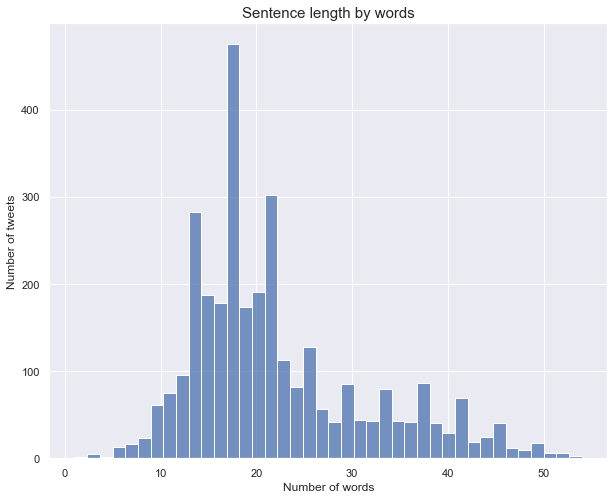

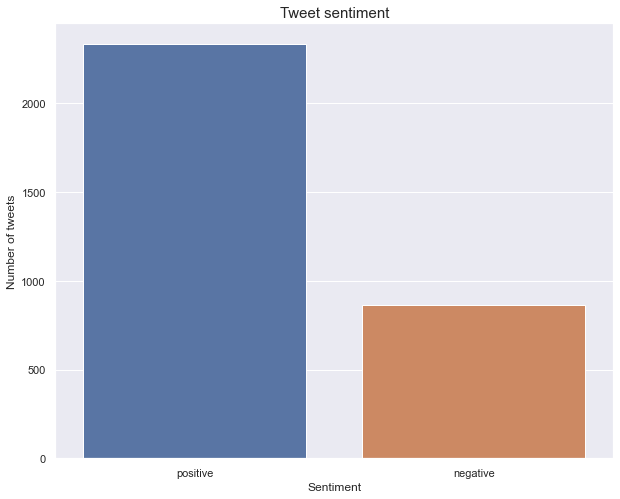

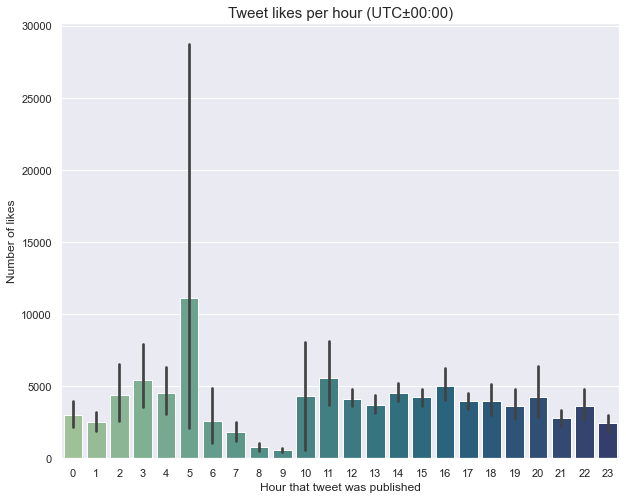

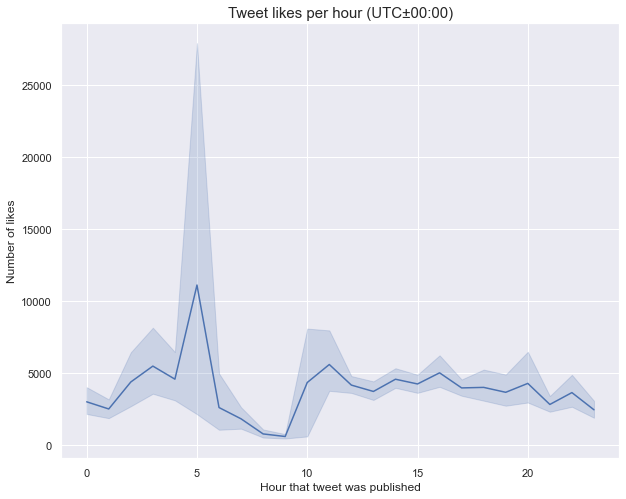

In [26]:
# Let's create some graphs!
plt.figure(figsize=(10,8))
sns.histplot(df['number_of_words'])
plt.title("Sentence length by words", fontsize=15)
plt.ylabel("Number of tweets", fontsize=12)
plt.xlabel("Number of words", fontsize=12)
plt.show()

plt.figure(figsize=(10,8))
sns.countplot(data=df, x='sentiment')
plt.title("Tweet sentiment", fontsize=15)
plt.ylabel("Number of tweets", fontsize=12)
plt.xlabel("Sentiment", fontsize=12)
plt.show()

plt.figure(figsize=(10,8))
sns.barplot(data=df, x='publish_hour', y='likes', palette='crest')
plt.title("Tweet likes per hour (UTC±00:00)", fontsize=15)
plt.ylabel("Number of likes", fontsize=12)
plt.xlabel("Hour that tweet was published", fontsize=12)
plt.show()

plt.figure(figsize=(10,8))
sns.set_theme(style='darkgrid')
sns.lineplot(data=df, x='publish_hour', y='likes')
plt.title("Tweet likes per hour (UTC±00:00)", fontsize=15)
plt.ylabel("Number of likes", fontsize=12)
plt.xlabel("Hour that tweet was published", fontsize=12)
plt.show()

In [27]:
# Let's build our model that tweet sentiment
x = df['tweets_cleaned']
y = df['likes']

# CountVectorizer to create our BoW
cv = CountVectorizer(max_features=1500, analyzer='word', ngram_range=(1, 3))


# Simple model
x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state=42)

x_train_cv = cv.fit_transform(x_train)
x_valid_cv = cv.transform(x_valid)

from sklearn import svm

svr = svm.SVR()
svr.fit(x_train_cv, y_train)

from sklearn.model_selection import cross_val_score
def get_score(model):
    return -1 * cross_val_score(model, x_train_cv, y_train, cv=10, scoring='neg_mean_absolute_error').mean()

get_score(svr)

3014.0567539887606